# Startup Prediction

Dataset Source:  https://www.kaggle.com/datasets/sanamps/predict-startup-profit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.sample(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
30,61994.48,115641.28,91131.24,Florida,99937.59
4,142107.34,91391.77,366168.42,Florida,166187.94
46,1315.46,115816.21,297114.46,Florida,49490.75
6,134615.46,147198.87,127716.82,California,156122.51
8,120542.52,148718.95,311613.29,New York,152211.77
2,153441.51,101145.55,407934.54,Florida,191050.39
15,114523.61,122616.84,261776.23,New York,129917.04
43,15505.73,127382.30,35534.17,New York,69758.98
28,66051.52,182645.56,118148.20,Florida,103282.38
7,130298.13,145530.06,323876.68,Florida,155752.60


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [8]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
num_col=['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

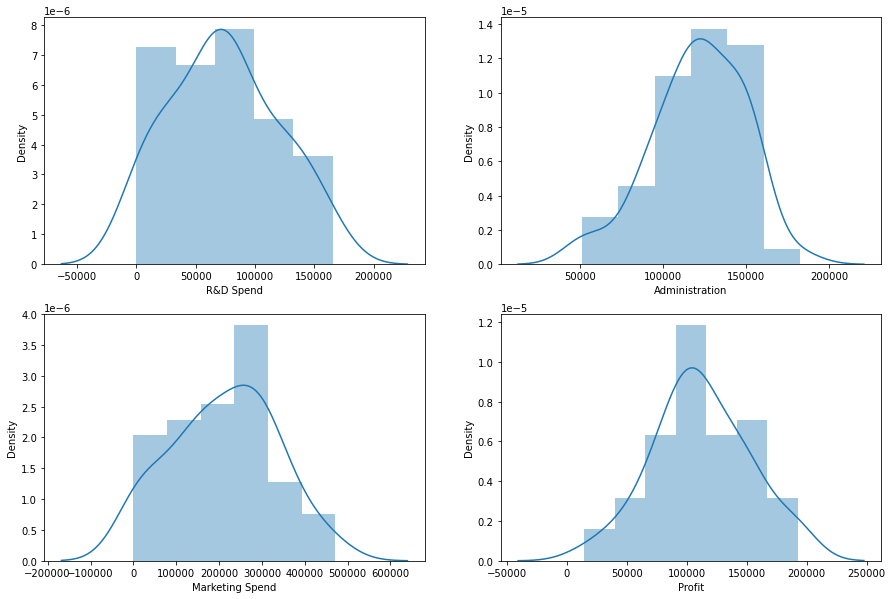

In [10]:
plt.figure(figsize=(15,10))
for index, col in enumerate(num_col):
    plt.subplot(2,2,index+1)
    sns.distplot(df[col])

# Scatter plot

In [11]:
df['Profit'].max()

192261.83

In [12]:
df.groupby('State')['Profit'].max()

State
California    191792.06
Florida       191050.39
New York      192261.83
Name: Profit, dtype: float64

<AxesSubplot:xlabel='State', ylabel='Profit'>

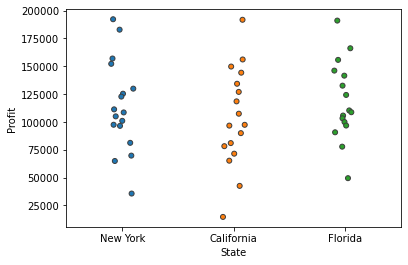

In [13]:
sns.stripplot(x='State',y='Profit',data=df,linewidth=0.99)

<AxesSubplot:xlabel='State', ylabel='Profit'>

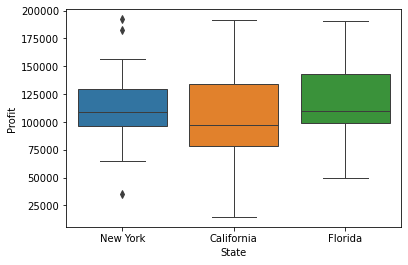

In [14]:
sns.boxplot(x='State',y='Profit',data=df,linewidth=0.99)

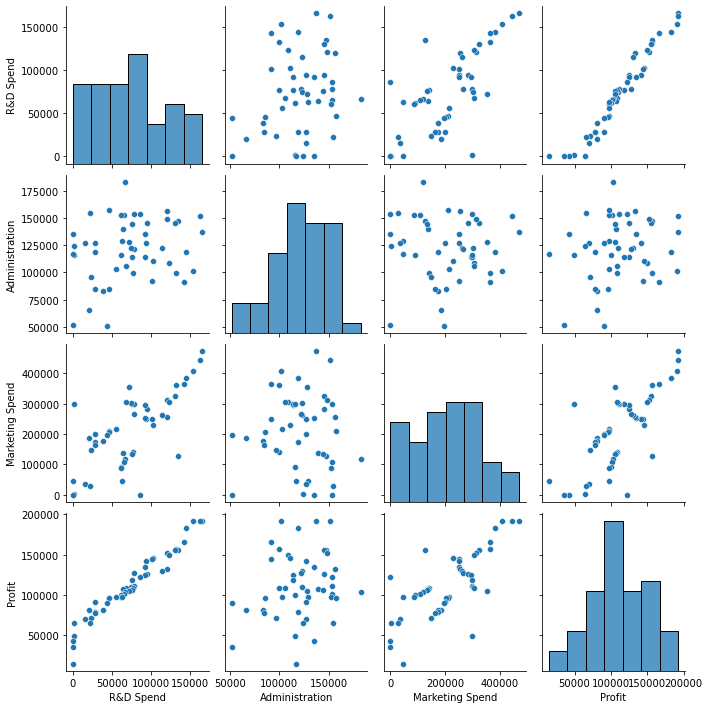

In [15]:
sns.pairplot(df)

# Data Pre Processing

In [16]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [17]:
df.duplicated().sum()

0

## Splitting the dataset into x and y

In [18]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [19]:
x =df.drop(['Administration','State', 'Profit'],axis=1)
y =df['Profit']

In [20]:
x

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42
5,131876.90,362861.36
6,134615.46,127716.82
7,130298.13,323876.68
8,120542.52,311613.29
9,123334.88,304981.62


In [21]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

# Train and Test Split

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [23]:
print('Linear Regression Model Score',reg.score(x,y)*100)

Linear Regression Model Score 95.04503015559763


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

### PolyNomial Regression

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x)
p_reg=LinearRegression()
p_reg.fit(x_poly,y)

LinearRegression()

In [26]:
print('Linear Regression Model Score',p_reg.score(x_poly,y)*100)

Linear Regression Model Score 96.30292767563486
